In [1]:
import pandas as pd

#数据加载
df_train = pd.read_csv('./cs-training.csv')
print(df_train)



        Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
...            ...               ...                                   ...   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-59DaysPastDueNotWorse    DebtRatio 

In [2]:
#去掉第一列无效列
df_train = df_train.iloc[:,1:]
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
#step1 数据探索
#对SeriousDlqin2yrs 违约率进行可视化
import seaborn as sns

sns.countplot(x='SeriousDlqin2yrs',data=df_train)

D:\python\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#违约比例
df_train.SeriousDlqin2yrs.sum()/len(df_train)

0.06684

In [5]:
#查看缺失值
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
#个别字段详情查看,及直方图分布
df_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

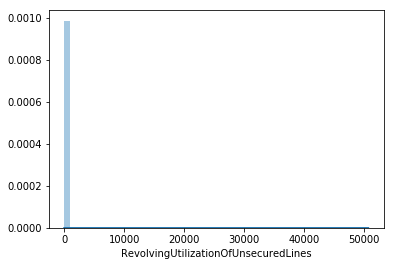

In [7]:
sns.distplot(df_train.RevolvingUtilizationOfUnsecuredLines)

In [8]:
#数据填充
df_train.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [9]:
#中位数，可见与均值相比，一些字段的中位数与平均数差距较大，说明有极大数值拉扯平均数，这里选择用中位数进行填充。
df_train.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [10]:
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [11]:
#数据分箱
#对于age字段，分成6段 [-math.inf, 25, 40, 50, 60, 70, math.inf]
#对于NumberOfDependents（家属人数）字段，分成6段 [-math.inf,2,4,6,8,10,math.inf]

#对age字段进行分箱
import math
age_bins=[-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age'] = pd.cut(df_train.age,bins=age_bins)
df_train.bin_age

0         (40.0, 50.0]
1         (25.0, 40.0]
2         (25.0, 40.0]
3         (25.0, 40.0]
4         (40.0, 50.0]
              ...     
149995     (70.0, inf]
149996    (40.0, 50.0]
149997    (50.0, 60.0]
149998    (25.0, 40.0]
149999    (60.0, 70.0]
Name: bin_age, Length: 150000, dtype: category
Categories (6, interval[float64]): [(-inf, 25.0] < (25.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, inf]]

In [12]:
#对于NumberOfDependents（家属人数）字段分箱，
dependent_bins = [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train.NumberOfDependents,bins=dependent_bins)
df_train[['bin_NumberOfDependents','NumberOfDependents']]

,bin_NumberOfDependents,NumberOfDependents
0,"(-inf, 2.0]",2.0
1,"(-inf, 2.0]",1.0
2,"(-inf, 2.0]",0.0
3,"(-inf, 2.0]",0.0
4,"(-inf, 2.0]",0.0
...,...,...
149995,"(-inf, 2.0]",0.0
149996,"(-inf, 2.0]",2.0
149997,"(-inf, 2.0]",0.0
149998,"(-inf, 2.0]",0.0


In [13]:
#对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段  [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
dpd_bins =  [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)

df_train[['bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate']]


,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [16]:
#对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop')
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop')
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop')
loan_bins = [-math.inf,0,1,2,3,math.inf]
df_train['bin_NumberRealEstateLoansOrLines'] = pd.cut(df_train['NumberRealEstateLoansOrLines'],bins=loan_bins)

df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]"


In [17]:
df_train['bin_NumberRealEstateLoansOrLines'].value_counts()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [15]:
#统计分箱字段
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [30]:
# 计算IV,衡量变量的预测能力
import numpy as np
def cal_IV(df,feature,target):
    lst = []
    cols = ['Variable','Value','All','Bad']
    #对feature中的每个分箱取值进行遍历
    #unique代表不同值，nunique 代表 number of unique :不同值得个数
    for i in range(df[feature].nunique()):
        #得到第i个分箱取值
        val = list(df[feature].unique())[i]
        #统计feature,feature_value ,这个value的个数，及这个value导致value=1的个数
        lst.append([feature,val,df[df[feature]==val].count()[feature],
                    df[(df[feature]==val)&(df[target]==1)].count()[feature]])
    data = pd.DataFrame(lst,columns=cols)
    data = data[data.Bad > 0]
    data['Share'] = data.All/data.All.sum() #这个value所占比例
    data['Bad Rate'] = data.Bad / data.All #这个value导致bad得情况，在该value个数得比例
    data['Margin Bad'] = data.Bad /data.Bad.sum()
    data['Margin Good'] = (data.All - data.Bad) / (data.All.sum() - data.Bad.sum())
    data['woe'] = np.log(data['Margin Bad']/data['Margin Good'])
    data['iv'] = (data.woe * (data['Margin Bad'] - data['Margin Good'])).sum()
    data = data.sort_values(by=['Variable','Value'])
#     print(data)
    return data.iv.values[0]

cal_IV(df_train,'bin_age','SeriousDlqin2yrs')

0.24041120302785982

In [34]:
#计算每个字段的iv值,#只选择iv值 > 0.1 的，入选的字段有5个
feature_cols = []
for f in bin_cols:
    if cal_IV(df_train,f,'SeriousDlqin2yrs') > 0.1:
        feature_cols.append(f)
        print(f,cal_IV(df_train,f,'SeriousDlqin2yrs'))
print(feature_cols)

bin_age 0.24041120302785982
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
['bin_age', 'bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTime60-89DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate', 'bin_RevolvingUtilizationOfUnsecuredLines']


In [64]:
#计算这些特征的woe
def cal_woe(df, features, target):
    df_new = df.copy()
    for f in features:
        df_woe= df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join,df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad',target+'count':'all'})
        df_woe['good'] = df_woe['all']-df_woe['bad']
        df_woe['Margin Bad'] = df_woe.bad / df_woe.bad.sum()
        df_woe['Margin Good'] = df_woe.good / df_woe.good.sum()
        df_woe['woe'] = np.log1p(df_woe['Margin Bad'] / df_woe['Margin Good'])
        df_woe.columns = [c if c ==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe,on=f,how='left')
    return df_new


df_woe = cal_woe(df_train,bin_cols,'SeriousDlqin2yrs')

In [65]:
feature_cols = ['age', 
                'NumberOfTime30-59DaysPastDueNotWorse', 
                'NumberOfTime60-89DaysPastDueNotWorse', 
                'NumberOfTimes90DaysLate', 
                'RevolvingUtilizationOfUnsecuredLines']

In [66]:
#得到woe的规则   features,bin,woe
df_bin_to_woe=pd.DataFrame(columns=['features','bin','woe'])
for f in feature_cols:
    b='bin_'+f
    w='woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
print(df_bin_to_woe)

                                   features               bin       woe
0                                       age      (40.0, 50.0]  0.813822
1                                       age      (25.0, 40.0]  0.955231
5                                       age       (70.0, inf]  0.279404
6                                       age      (50.0, 60.0]  0.651655
15                                      age      (60.0, 70.0]  0.406848
19                                      age      (-inf, 25.0]  1.013134
0      NumberOfTime30-59DaysPastDueNotWorse        (1.0, 2.0]  1.797837
1      NumberOfTime30-59DaysPastDueNotWorse       (-inf, 1.0]  0.572521
13     NumberOfTime30-59DaysPastDueNotWorse        (2.0, 3.0]  2.151185
183    NumberOfTime30-59DaysPastDueNotWorse        (3.0, 4.0]  2.429111
191    NumberOfTime30-59DaysPastDueNotWorse        (4.0, 5.0]  2.520613
251    NumberOfTime30-59DaysPastDueNotWorse        (6.0, 7.0]  2.774776
423    NumberOfTime30-59DaysPastDueNotWorse        (9.0, inf]  2

In [67]:
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]

In [68]:
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines']

In [69]:
#逻辑回归
from sklearn.model_selection import train_test_split
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
x_train,x_test,y_train,y_test = train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],test_size=0.2,random_state=33)


In [71]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=33).fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(roc_auc_score(y_pred,y_test))

0.9361
0.7711361926102505
